<a href="https://colab.research.google.com/github/manu490/learningTensorFlow/blob/main/week2/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision problem 

We will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types of clothes.

# Let's Start coding

In [2]:
import tensorflow as tf

Importing Fashion MNSIT from keras since it's readily available on keras. Fasion MNSIT dataset is a collection of 28 x 28 grayscale cloth images with associated labels.

In [4]:
# load fashion MNIST

fminst = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give two sets of tuples , training and testing sets and their labels.

In [5]:
(training_images,training_labels), (testing_images, testing_labels) = fminst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Lets' Plot the data to make it easier to inspect. 

LABEL : 9

 IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

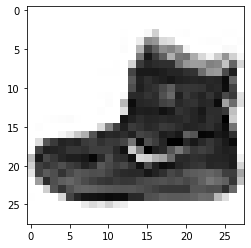

In [6]:
import numpy as np
import matplotlib.pyplot as plt

index = 0

# set number of characters per rows when printing

np.set_printoptions(linewidth=320)

print(f'LABEL : {training_labels[index]}')
print(f'\n IMAGE PIXEL ARRAY:\n {training_images[index]}')

plt.imshow(training_images[index],cmap="Greys")

Let's normalize the values by dividing everything by 255.

In [7]:
training_images = training_images / 255.0
testing_images  = testing_images  / 255.0

# Creating a callback class

We can create a callback by defining a class that inherits the tf.keras.callbacks.Callback base class

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 80 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.2):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

Now let's design the model

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation  = tf.nn.softmax)])

In [11]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4958 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8925


In [13]:

# Evaluate the model on unseen data
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8798


[0.34571993350982666, 0.879800021648407]